In [ ]:
#구글 코랩 이용시
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import os
import shutil

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models

In [12]:
#Original Data Path
Original_dataset_dir=("./datasets/train")

# Small Dataset Path
base_dir ='./datasets/cats_and_dogs_small'

if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
    
os.mkdir(base_dir)

In [3]:
# Train,validation,Test data
train_dir=os.path.join(base_dir,'train')
os.mkdir(train_dir)

validation_dir=os.path.join(base_dir,"validation")
os.mkdir(vaildation_dir)

test_dir=os.path.join(base_dir,"test")
os.mkdir(test_dir)

In [32]:
train_cats_dir=os.path.join(train_dir,"cats")
train_doogs_dir=os.path.join(train_dir,"dogs")
validation_cats_dir=os.path.join(validation_dir,"cats")
validation_dogs_dir=os.path.join(validation_dir,"dogs")
test_cats_dir=os.path.join(test_dir,"cats")
test_dogs_dir=os.path.join(test_dir,"dogs")

os.mkdir(train_cats_dir)
os.mkdir(train_doogs_dir)
#os.mkdir(validation_cats_dir)
#os.mkdir(validation_dogs_dir)
#os.mkdir(test_cats_dir)
#os.mkdir(test_dogs_dir)

In [36]:
#dog train data copy
fnames=['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(Original_dataset_dir,fname)
    dst = os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,dst)
    
#dog train data copy
fnames=['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(Original_dataset_dir,fname)
    dst = os.path.join(train_doogs_dir,fname)
    shutil.copyfile(src,dst)
    
    

In [37]:
#cat vaildation data copy
fnames=['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(Original_dataset_dir,fname)
    dst = os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,dst)
    
#dog vaildation data copy
fnames=['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(Original_dataset_dir,fname)
    dst = os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [38]:
#cat test data copy
fnames=['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(Original_dataset_dir,fname)
    dst = os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,dst)
    

#dog test data copy
fnames=['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(Original_dataset_dir,fname)
    dst = os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [39]:
print('Train cat images:',len(os.listdir(train_cats_dir)))

print('Train cat images:',len(os.listdir(validation_cats_dir)))

Train cat images: 1000
Train cat images: 502


In [40]:
#Build network

from tensorflow.keras import layers
from tensorflow.keras import models

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [44]:
from tensorflow.keras import optimizers

model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

In [65]:
#Data preprocessing

#Image scaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
validation_generator=validation_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')


Found 2001 images belonging to 2 classes.
Found 1002 images belonging to 2 classes.


In [48]:
for data_batch,labels_batch in train_generator:
    print('Batch Data Size:',data_batch.shape)
    print('Batch Label Size:',labels_batch.shape)
    break

Batch Data Size: (20, 150, 150, 3)
Batch Label Size: (20,)


In [ ]:
len(train_generator)

In [49]:
history= model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=(validation_generator),validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 65s 653ms/step - loss: 0.8050 - accuracy: 0.5215 - val_loss: 0.6918 - val_accuracy: 0.5050
Epoch 2/30
100/100 [==============================] - 59s 590ms/step - loss: 0.6939 - accuracy: 0.5184 - val_loss: 0.6549 - val_accuracy: 0.5930
Epoch 3/30
100/100 [==============================] - 59s 592ms/step - loss: 0.6796 - accuracy: 0.6315 - val_loss: 0.8625 - val_accuracy: 0.5310
Epoch 4/30
100/100 [==============================] - 59s 589ms/step - loss: 0.6354 - accuracy: 0.6583 - val_loss: 0.6100 - val_accuracy: 0.6820
Epoch 5/30
100/100 [==============================] - 59s 587ms/step - loss: 0.5785 - accuracy: 0.6986 - val_loss: 0.6624 - val_accuracy: 0.6560
Epoch 6/30
100/100 [==============================] - 59s 588ms/step - loss: 0.5299 - accuracy: 0.7410 - val_loss: 0.7119 - val_accuracy: 0.6710
Epoch 7/30
100/100 [==============================] - 

In [50]:
model.save('cats_and_dogs_small_1.0.h5')

Text(0.5, 1.0, 'Training and Validation loss')

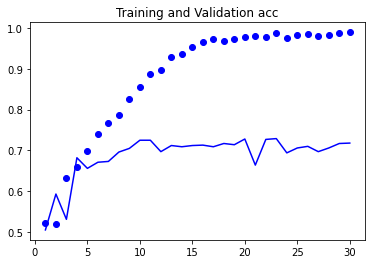

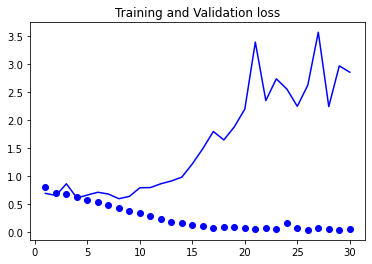

In [53]:
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history["val_accuracy"]
loss=history.history['loss']
val_loss=history.history["val_loss"]

epochs=range(1,len(acc)+1)


plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b-',label="Validation acc")
plt.title("Training and Validation acc")

plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b-',label="Validation loss")
plt.title("Training and Validation loss")


In [54]:
datagen=ImageDataGenerator(rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,
                           horizontal_flip=True,fill_mode='nearest')

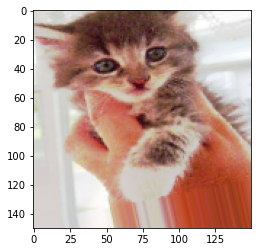

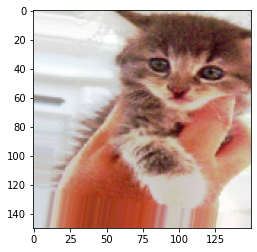

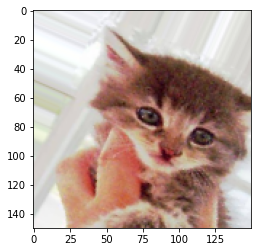

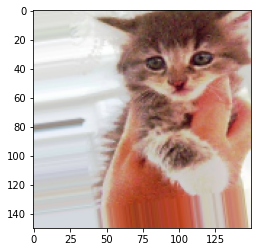

In [64]:
from tensorflow.keras.preprocessing import image

fnames=sorted([os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)])
img_path=fnames[3]

img=image.load_img(img_path,target_size=(150,150))

x=image.img_to_array(img)
x=x.reshape((1,)+x.shape)

i=0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot=plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i%4 ==0:
        break
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,
                                   horizontal_flip=True,)
# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)
# 모든 이미지를 150 × 150 크기로 바꿉니
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=32,class_mode='binary')
# binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다   
validation_generator = test_datagen.flow_from_directory( validation_dir,target_size=(150, 150),batch_size=32,class_mode='binary')
history = model.fit_generator(train_generator,steps_per_epoch=10,epochs=100,validation_data=validation_generator,validation_steps=50)
